In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
male = pd.read_csv('./Data/MaleAlcoholUse.csv')
female = pd.read_csv('./Data/FemaleAlcoholUse.csv')
male.head()

,Unnamed: 0,Country Code,2018
0,1,ABW,NaN
1,2,AFE,8.497960
2,3,AFG,0.360000
3,4,AFW,11.007336
4,5,AGO,11.050000


In [13]:
female.head()

,Unnamed: 0,Country Code,2018
0,1,ABW,NaN
1,2,AFE,1.972143
2,3,AFG,0.055000
3,4,AFW,2.694734
4,5,AGO,3.100000


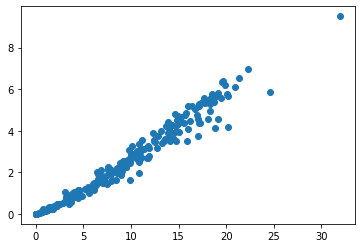

In [11]:
plt.scatter(male['2018'], female['2018'])

In [12]:
ratio = male['2018']/female['2018']
ratio

0           NaN
1      4.308998
2      6.545455
3      4.084758
4      3.564516
         ...   
261         NaN
262    6.769231
263    4.558739
264    4.053435
265    4.907975
Name: 2018, Length: 266, dtype: float64

In [14]:
np.mean(ratio)

4.255204976286519

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# regr = LinearRegression()
# regr.fit(female['2018'], male['2018'])
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

In [23]:
prevalence = pd.read_csv('./Data/Prevalence.csv')
prevalence.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,16.9,NaN
1,AUT,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,13.0,NaN
2,BEL,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,24.0,NaN
3,CAN,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,1.9,NaN
4,CZE,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,21.0,NaN


In [27]:
df = pd.merge(prevalence, female, left_on='LOCATION', right_on='Country Code')
df.head()
# corr(prevalence['Value'], )

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Unnamed: 0,Country Code,2018
0,AUS,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,16.9,NaN,14,AUS,5.18
1,AUT,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,13.0,NaN,15,AUT,5.77
2,BEL,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,24.0,NaN,18,BEL,5.27
3,CAN,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,1.9,NaN,36,CAN,4.07
4,CZE,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,21.0,NaN,55,CZE,6.99


In [28]:
df = pd.merge(df, male, left_on='LOCATION', right_on='Country Code')
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes,Unnamed: 0_x,Country Code_x,2018_x,Unnamed: 0_y,Country Code_y,2018_y
0,AUS,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,16.9,NaN,14,AUS,5.18,14,AUS,15.96
1,AUT,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,13.0,NaN,15,AUT,5.77,15,AUT,18.49
2,BEL,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,24.0,NaN,18,BEL,5.27,18,BEL,17.15
3,CAN,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,1.9,NaN,36,CAN,4.07,36,CAN,13.95
4,CZE,VIOLWOMEN,PREVVIOLLIFETIME,PC,A,2019,21.0,NaN,55,CZE,6.99,55,CZE,22.28


In [34]:
df = df[['Value', '2018_x', '2018_y']]
df.head()

,Value,2018_x,2018_y
0,16.9,5.18,15.96
1,13.0,5.77,18.49
2,24.0,5.27,17.15
3,1.9,4.07,13.95
4,21.0,6.99,22.28


In [36]:
df.corr()

,Value,2018_x,2018_y
Value,1.000000,-0.374501,-0.371972
2018_x,-0.374501,1.000000,0.976178
2018_y,-0.371972,0.976178,1.000000
